# Setup

In [2]:
import os

In [3]:
os.chdir('..')

In [4]:
os.getcwd()

'c:\\Users\\ay011\\PycharmProjects\\NeRF'

In [5]:
import yaml
import numpy as np
import imageio

In [17]:
dataset = 'flower'
datadir = f'./dataset/nerf_llff_data/{dataset}'
factor = 8
bd_factor=.75
path_zflat=False


imgdir = os.path.join(datadir, 'images')
img_paths = [os.path.join(imgdir, f) for f in sorted(os.listdir(imgdir)) if
                f.endswith('JPG') or f.endswith('jpg') or f.endswith('png')]


datadir

'./dataset/nerf_llff_data/flower'

In [20]:
sh = imageio.imread(img_paths[0]).shape
sh

c:\Users\ay011\anaconda3\envs\nerf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


(3024, 4032, 3)

# Trimesh

![사진](../dataset/nerf_llff_data/flower/trimesh.png)

# Pose

In [31]:
poses_arr = np.load(os.path.join(datadir, 'poses_bounds.npy'))
poses = poses_arr[:, :-2].reshape([-1, 3, 5])
poses = np.concatenate([poses[:, 1:2, :], -poses[:, 0:1, :], poses[:, 2:, :]], 1)
bds = poses_arr[:, -2:]

In [32]:
poses.shape, bds.shape

((34, 3, 5), (34, 2))

# Sample Case : Image 0

In [33]:
case = 0

img = imageio.imread(img_paths[case])
pose = poses[case]
bd = bds[case]

c:\Users\ay011\anaconda3\envs\nerf\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
for i in range(5):
    print(i, pose[:, i])

0 [ 0.99962852 -0.01294097  0.02398638]
1 [-0.01288403 -0.99991381 -0.00252655]
2 [ 0.02401701  0.00221657 -0.99970909]
3 [-2.23216201  5.55752123  1.38032517]
4 [ 4032.         -3024.          3575.05860595]


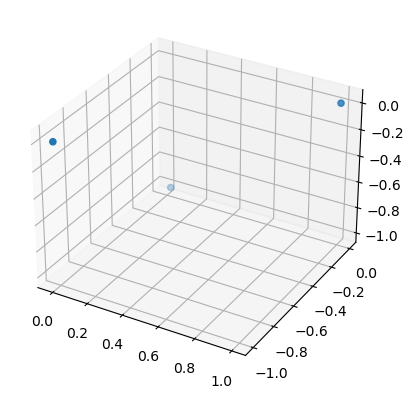

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pose[:, 0], pose[:, 1], pose[:, 2])
plt.show()